## <center> How to Using a Public API with Python | Automating Crypto Website API Pull Using Python</center>

### API: It basically acts as an intermediary between two different applications that want to talk to each other.
### An API typically has a client and a server and so the application or the person that is submitting the request that is the client and then the server is the application that is sending the response to that request.   

### Let's start 

### 1- open CoinMarketCap website
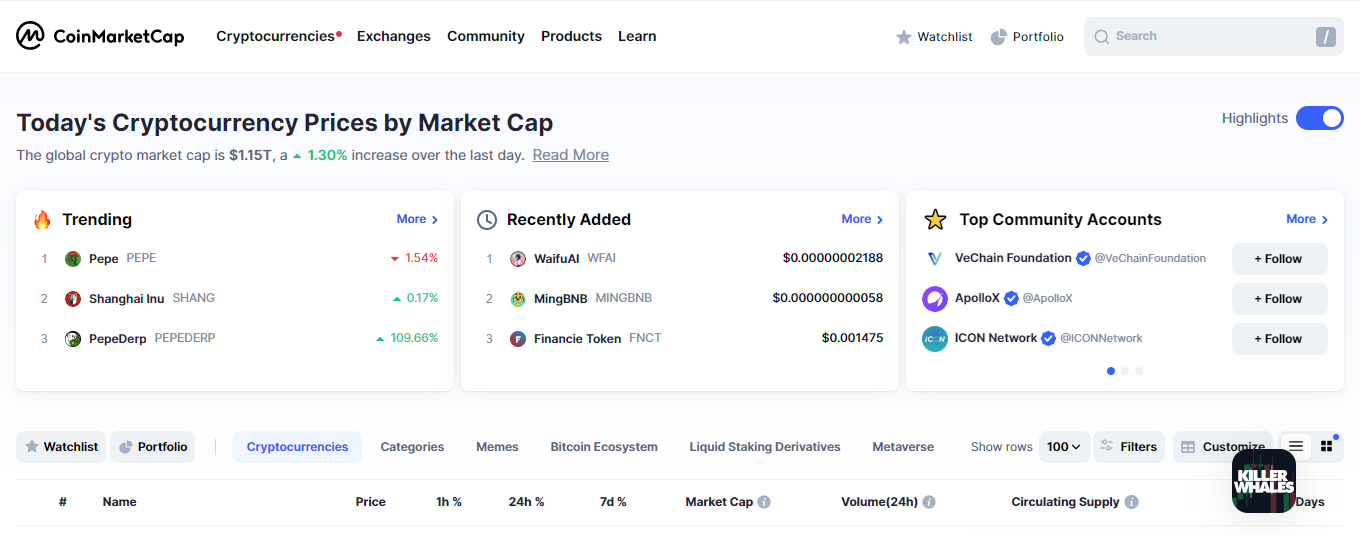 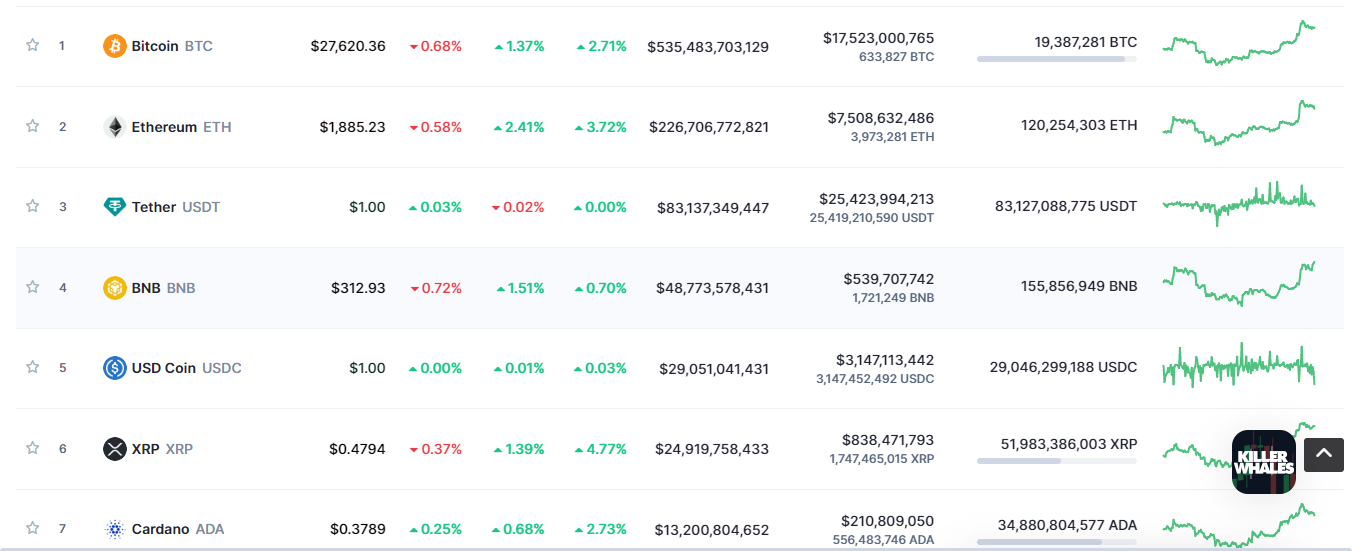

### 2- Go down to "products service" then to "Crypto API"
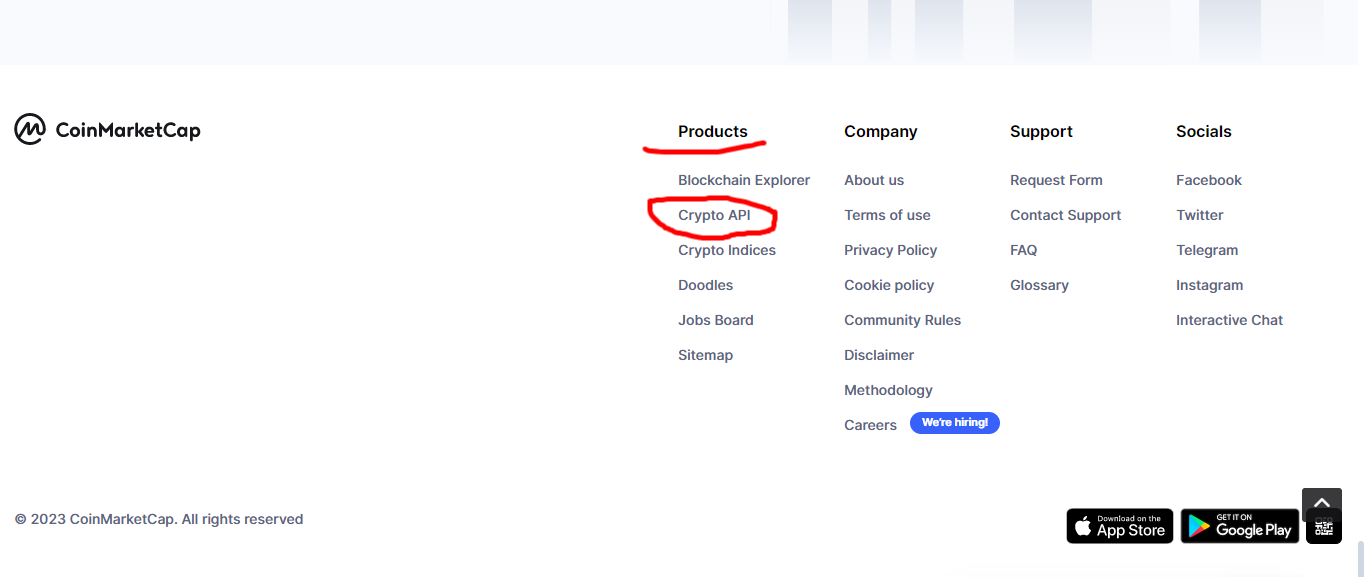

### Then  press on "get your API key now"

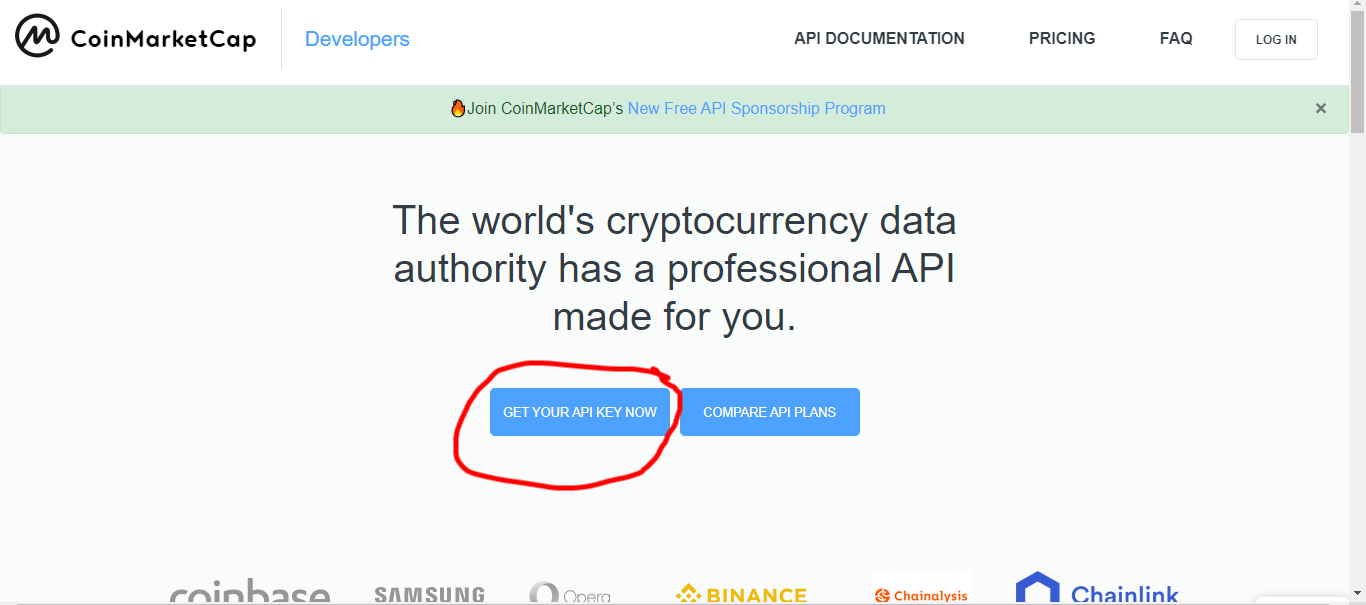

### 3- Create an account on CoinMarketCap website

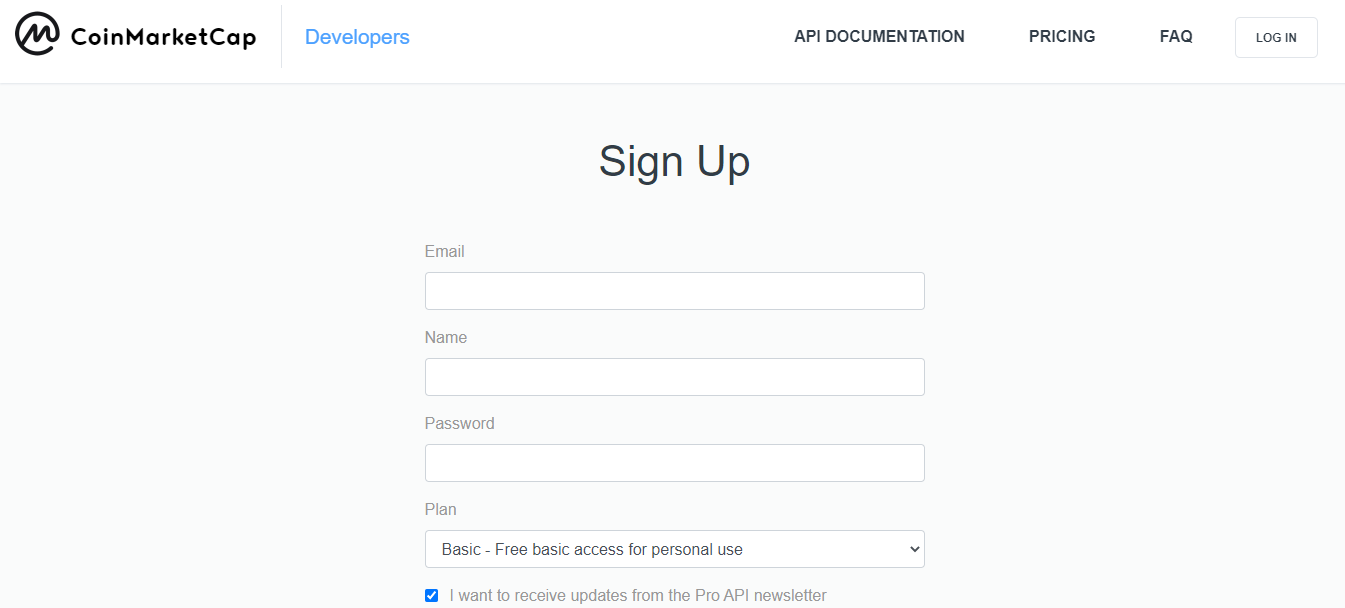

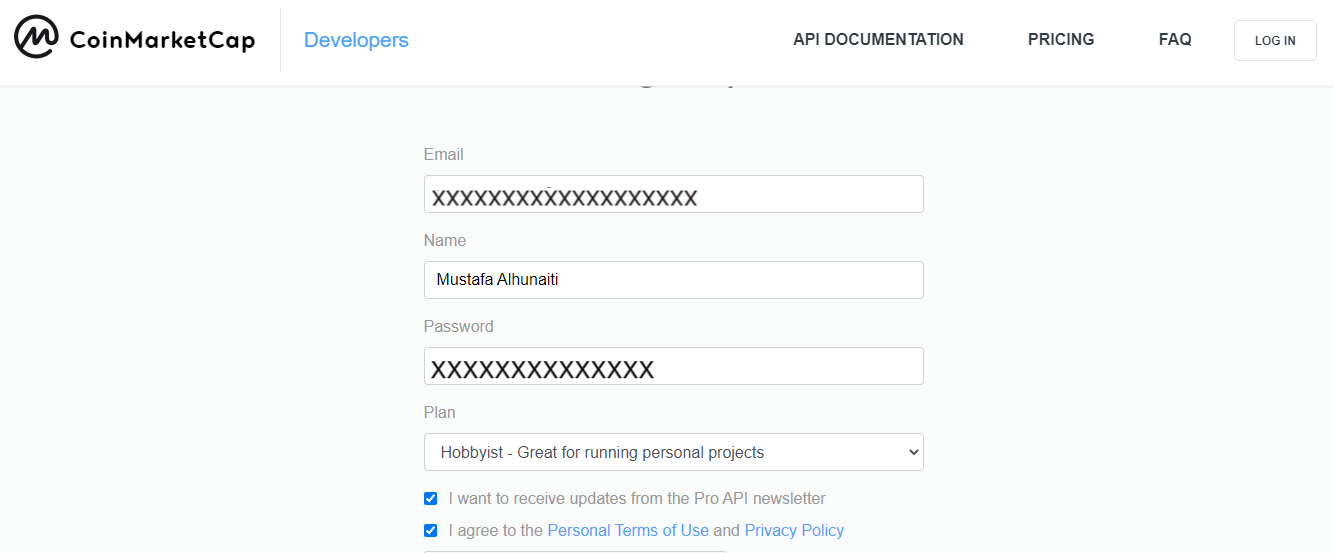

### After creating an account he will bring you here 
### Copy the Key via hover under the API key 
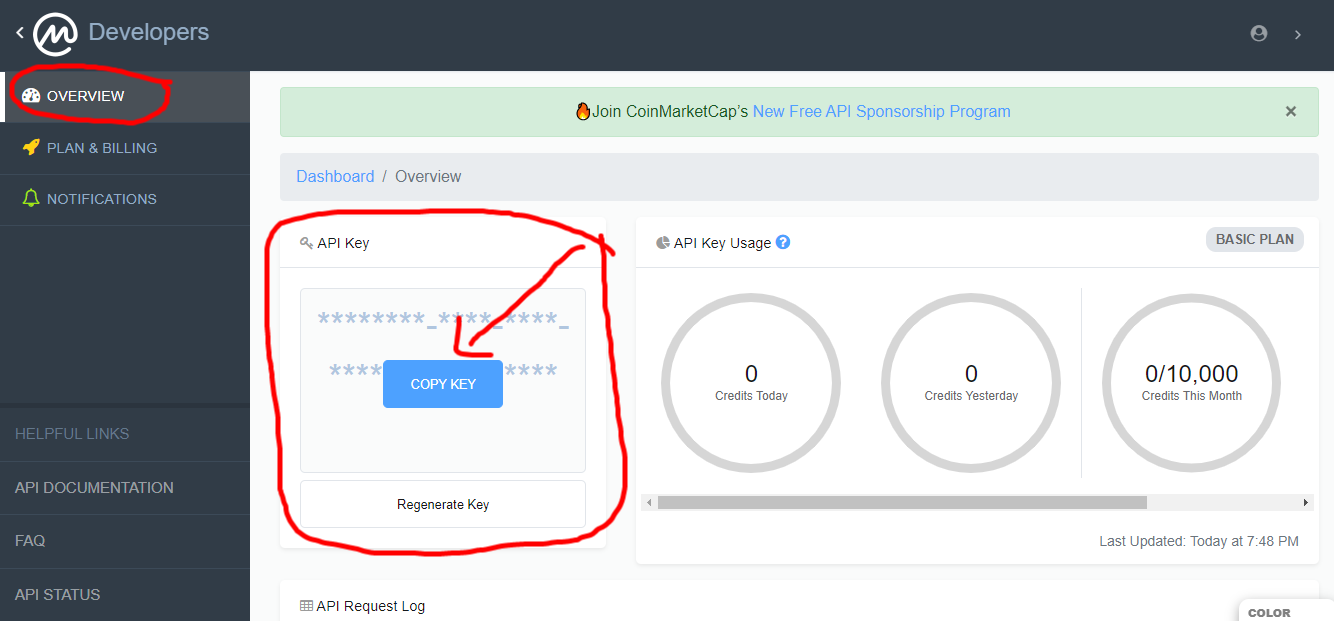

###  Before we continue, there is something really important to know which is the API documentation

### API documentation
#### one thing that you should always look for when you're using an API is the API documentation 

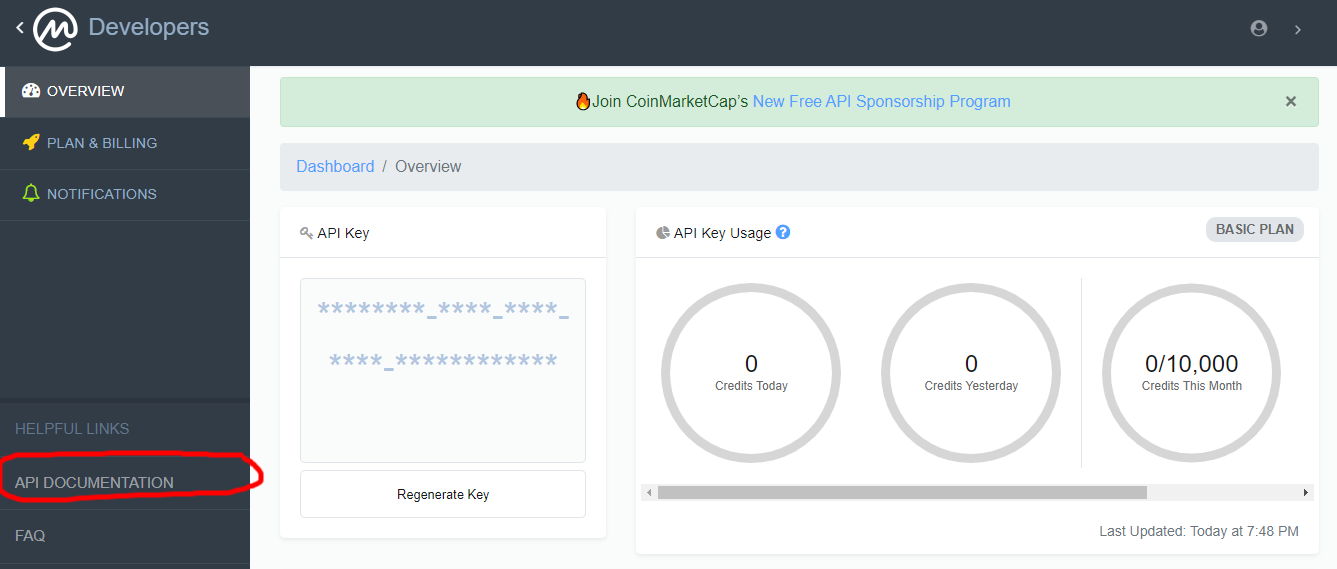

### Documentation for an API can be extremely important because not all APIs are set up exactly the same and so they're going to show you how to access it and how to use the keys it's really important that you read through this because they may have certain limitations or stipulations on how to use it  

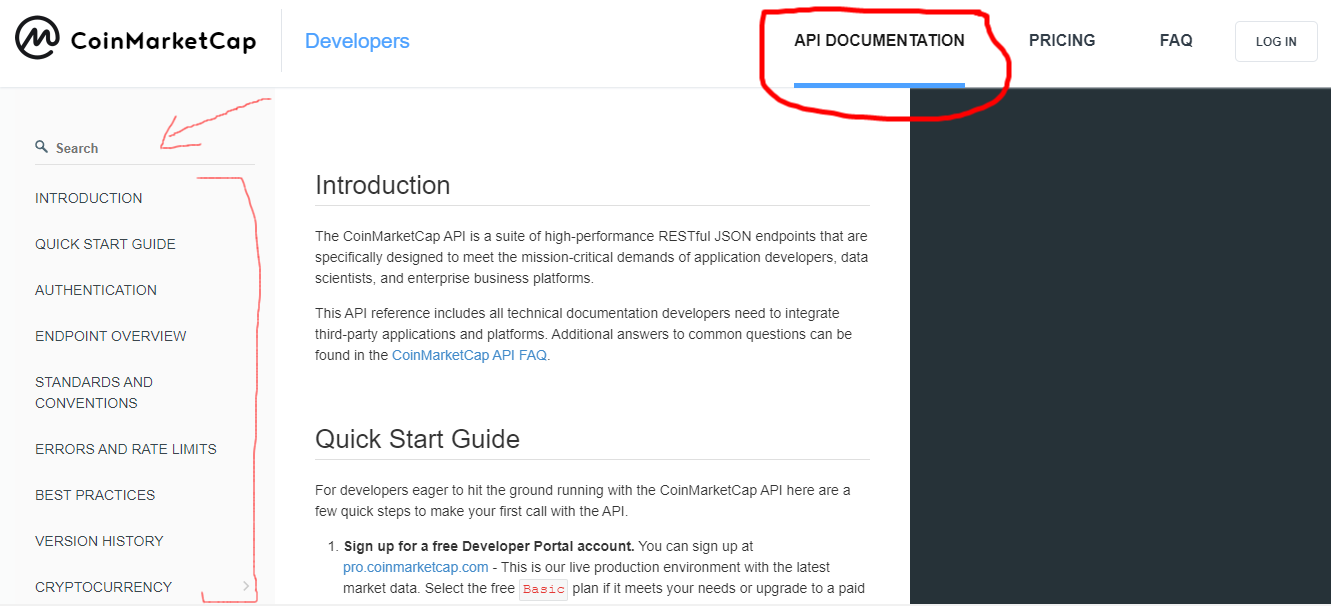

### I prefer to you read all the documentation.


### Copy the python code from  the documentation 👇 then put it on Jupyter Notebook
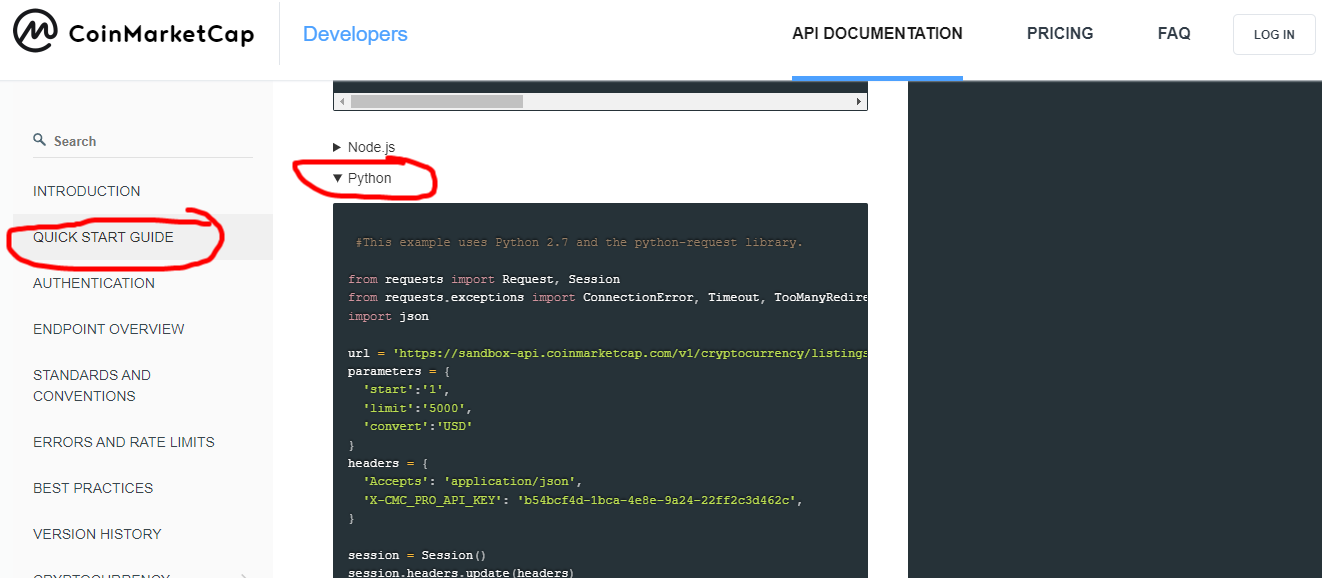

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # All requests should target domain https://pro-api.coinmarketcap.com
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '70c21e7a-d4cb-4e15-8618-9a47bdb71916', # here we will put our key between the Single Quotes 
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-06-01T11:59:47.560Z', 'error_code': 0, 'error_message': None, 'elapsed': 4447, 'credit_count': 25, 'notice': None, 'total_count': 10326}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10237, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', '

### You will get this Error when you try it for the first time 

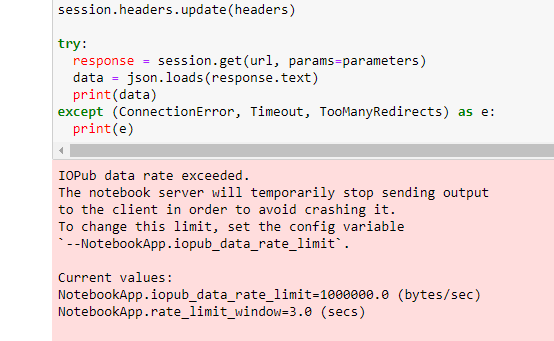

### i wanted to show you how to fix it

### what we need to do is actually increase the data rate limit 
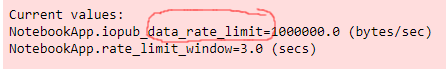

### so all we're going to do for that is we're going to search and we're going to say "anaconda prompt"
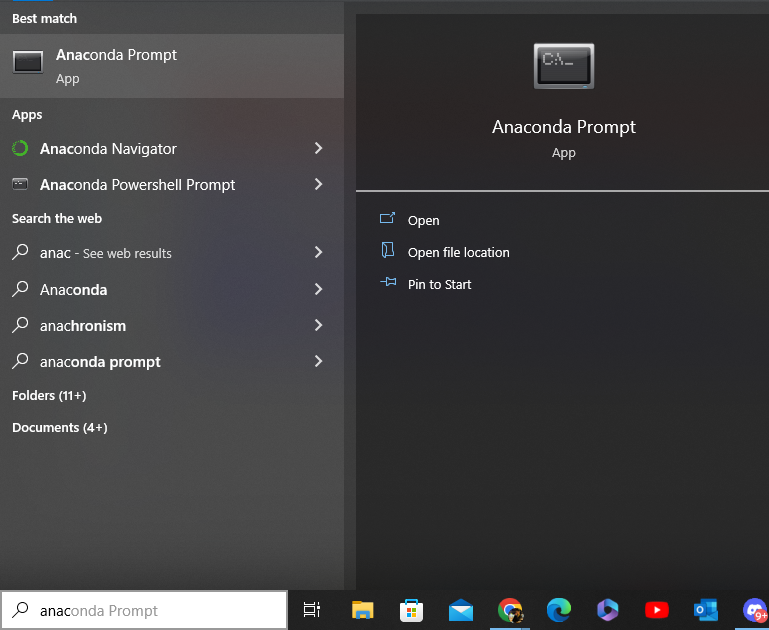

### we're going to increase the limit of the data that we can pull or increase our data rate limit 
#### put this in anaconda prompt  " jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000 " then press enter
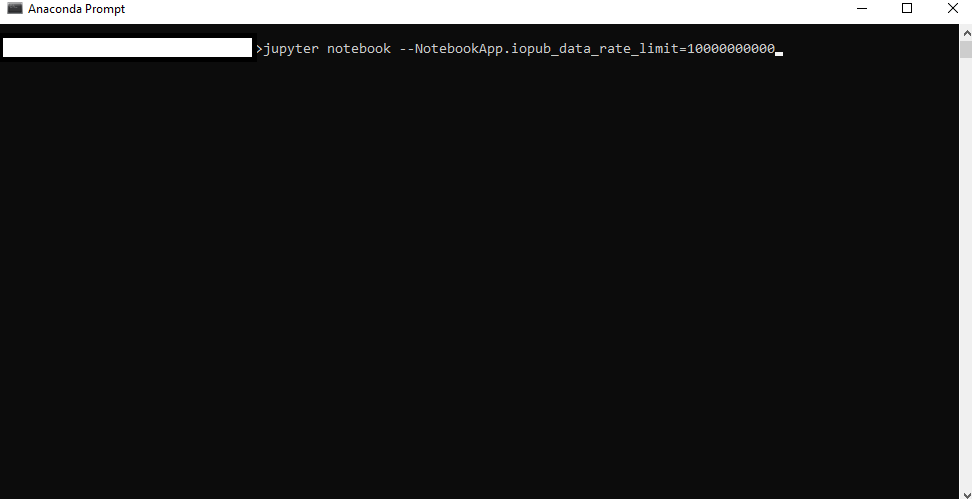

### Then copy this URL and put it on the browser
### the request will work after that  
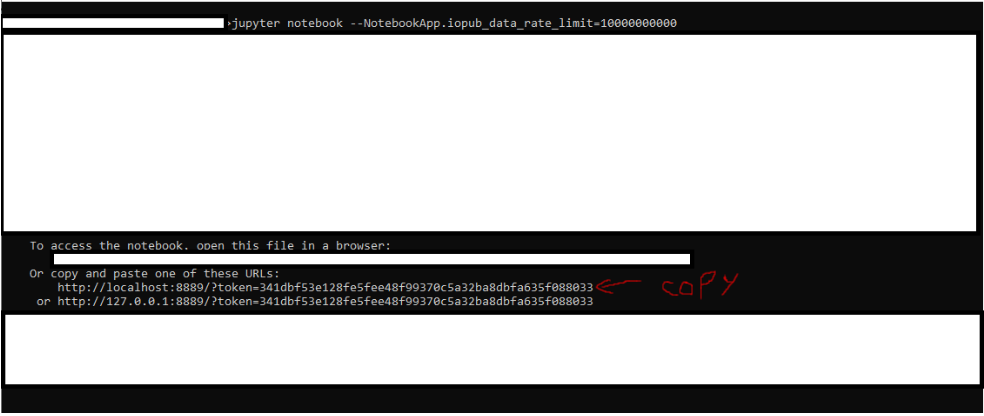

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # All requests should target domain https://pro-api.coinmarketcap.com
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '70c21e7a-d4cb-4e15-8618-9a47bdb71916', # here we will put our key between the Single Quotes 
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000"
# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host URL

{'status': {'timestamp': '2023-06-01T11:59:49.253Z', 'error_code': 0, 'error_message': None, 'elapsed': 71, 'credit_count': 1, 'notice': None, 'total_count': 10326}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10237, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

### This is actually in json format so use this json.loads.
### in order to get it kind of into usable state 
### json normalize  which is just going to make this look a lot prettier  basically we going to put it into data frame

In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe
pd.json_normalize(data['status'])

timestamp  error_code error_message  elapsed  credit_count  \
0  2023-06-01T11:59:49.253Z           0          None       71             1   

  notice  total_count  
0   None        10326

In [6]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Hussam AlHunaiti\AppData\Local\Temp\ipykernel_20472\3803338549.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


id         name symbol          slug  num_market_pairs  \
0      1      Bitcoin    BTC       bitcoin             10237   
1   1027     Ethereum    ETH      ethereum              6960   
2    825       Tether   USDT        tether             54908   
3   1839          BNB    BNB           bnb              1440   
4   3408     USD Coin   USDC      usd-coin             12768   
5     52          XRP    XRP           xrp               958   
6   2010      Cardano    ADA       cardano               797   
7     74     Dogecoin   DOGE      dogecoin               717   
8   3890      Polygon  MATIC       polygon               727   
9   5426       Solana    SOL        solana               468   
10  1958         TRON    TRX          tron               764   
11     2     Litecoin    LTC      litecoin               917   
12  6636     Polkadot    DOT  polkadot-new               506   
13  4687  Binance USD   BUSD   binance-usd              6854   
14  5994    Shiba Inu   SHIB     shiba-inu               536   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2019-04-28T00:00:00.000Z   
9   2020-04-10T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2013-04-28T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2019-09-20T00:00:00.000Z   
14  2020-08-01T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [pos, platform, enterprise-solutions, zero-kno...  1.000000e+10   
9   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
10                  [media, payments, tron-ecosystem]           NaN   
11        [mineable, pow, scrypt, medium-of-exchange]  8.400000e+07   
12  [substrate, polkadot, binance-chain, polkadot-...           NaN   
13  [stablecoin, asset-backed-stablecoin, binance-...           NaN   
14      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.938976e+07  1.938976e+07            False       NaN         1   
1         1.202456e+08  1.202456e+08             True       NaN         2   
2         8.322234e+10  8.609064e+10             True       NaN         3   
3         1.558564e+08  1.558564e+08            False       NaN         4   
4         2.887929e+10  2.887929e+10            False       NaN         5   
5         5.198339e+10  9.998892e+10            False       NaN         6   
6         3.488369e+10  3.584278e+10            False       NaN         7   
7         1.395849e+11  1.395849e+11             True       NaN         8   
8         9.279469e+09  1.000000e+10            False       NaN         9   
9         3.965955e+08  5.490279e+08             True       NaN        10   
10        9.022259e+10  9.022275e+10             True       NaN        11   
11        7.304855e+07  8.400000e+07            False       NaN        12   
12        1.189743e+09  1.319221e+09             True       NaN        13   
13        5.196034e+09  5.196034e+09             True       NaN        14   
14        5.893497e+14  5.895914e+14            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_ratio  \
0                     

In [11]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # All requests should target domain https://pro-api.coinmarketcap.com
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '70c21e7a-d4cb-4e15-8618-9a47bdb71916', # here we will put our key between the Single Quotes 
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000"
# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host URL


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df
    
    if not os.path.isfile(r'C:\Users\Hussam AlHunaiti\Desktop\MustafaProjects\Python\How to Using a Public API with Python - Automating Crypto Website API Pull Using Python\API.csv'):
        df.to_csv(r'C:\Users\Hussam AlHunaiti\Desktop\MustafaProjects\Python\How to Using a Public API with Python - Automating Crypto Website API Pull Using Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Hussam AlHunaiti\Desktop\MustafaProjects\Python\How to Using a Public API with Python - Automating Crypto Website API Pull Using Python\API.csv'', mode='a', header=False)

In [12]:
import os
import time 
# from time import time 
# from time import sleep 

for i in range(333):
    api_runner()
    print("API runner completed")
    time.sleep(60) # sleep for 1 minute
exit()

API runner completed
API runner completed


KeyboardInterrupt: 

In [14]:
df3 = pd.read_csv(r'C:\Users\Hussam AlHunaiti\Desktop\MustafaProjects\Python\How to Using a Public API with Python - Automating Crypto Website API Pull Using Python\API.csv')
df3

Unnamed: 0    id         name symbol          slug  num_market_pairs  \
0            0     1      Bitcoin    BTC       bitcoin             10237   
1            1  1027     Ethereum    ETH      ethereum              6960   
2            2   825       Tether   USDT        tether             54908   
3            3  1839          BNB    BNB           bnb              1440   
4            4  3408     USD Coin   USDC      usd-coin             12768   
5            5    52          XRP    XRP           xrp               958   
6            6  2010      Cardano    ADA       cardano               797   
7            7    74     Dogecoin   DOGE      dogecoin               717   
8            8  3890      Polygon  MATIC       polygon               727   
9            9  5426       Solana    SOL        solana               468   
10          10  1958         TRON    TRX          tron               764   
11          11     2     Litecoin    LTC      litecoin               917   
12          12  6636     Polkadot    DOT  polkadot-new               506   
13          13  4687  Binance USD   BUSD   binance-usd              6854   
14          14  5994    Shiba Inu   SHIB     shiba-inu               536   
15           0     1      Bitcoin    BTC       bitcoin             10237   
16           1  1027     Ethereum    ETH      ethereum              6960   
17           2   825       Tether   USDT        tether             54908   
18           3  1839          BNB    BNB           bnb              1440   
19           4  3408     USD Coin   USDC      usd-coin             12768   
20           5    52          XRP    XRP           xrp               958   
21           6  2010      Cardano    ADA       cardano               797   
22           7    74     Dogecoin   DOGE      dogecoin               717   
23           8  3890      Polygon  MATIC       polygon               727   
24           9  5426       Solana    SOL        solana               468   
25          10  1958         TRON    TRX          tron               764   
26          11     2     Litecoin    LTC      litecoin               917   
27          12  6636     Polkadot    DOT  polkadot-new               506   
28          13  4687  Binance USD   BUSD   binance-usd              6854   
29          14  5994    Shiba Inu   SHIB     shiba-inu               536   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2019-04-28T00:00:00.000Z   
9   2020-04-10T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2013-04-28T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2019-09-20T00:00:00.000Z   
14  2020-08-01T00:00:00.000Z   
15  2010-07-13T00:00:00.000Z   
16  2015-08-07T00:00:00.000Z   
17  2015-02-25T00:00:00.000Z   
18  2017-07-25T00:00:00.000Z   
19  2018-10-08T00:00:00.000Z   
20  2013-08-04T00:00:00.000Z   
21  2017-10-01T00:00:00.000Z   
22  2013-12-15T00:00:00.000Z   
23  2019-04-28T00:00:00.000Z   
24  2020-04-10T00:00:00.000Z   
25  2017-09-13T00:00:00.000Z   
26  2013-04-28T00:00:00.000Z   
27  2020-08-19T00:00:00.000Z   
28  2019-09-20T00:00:00.000Z   
29  2020-08-01T00:00:00.000Z   

                                                 tags    max_supply  \
0   ['mineable', 'pow', 'sha-256', 'store-of-value...  2.100000e+07   
1   ['pos', 'smart-contracts', 'ethereum-ecosystem...           NaN   
2   ['payments', 'stablecoin', 'asset-backed-stabl...           NaN   
3   ['marketplace', 'centralized-exchange', 'payme...           NaN   
4   ['medium-of-exchange', 'stablecoin', 'asset-ba...           NaN   
5   ['medium-of-exchange', 'enterprise-solutions',...  1.000000e+11   
6   ['dpos', 'pos', 'platform', 'research', 'smart...  4.500000e+10   
7   ['mineable', 'pow', 'scrypt', 'medium-of-excha...           NaN   
8   ['pos', 'pl